In [6]:
import requests
import csv

# set the API endpoint and parameters
api_endpoint = 'https://www.airnowapi.org/aq/observation/latLong/current/'
api_params = {
    'format': 'application/json',
    'latitude': '37.335480',
    'longitude': '-121.893028',
    'distance': '25',
    'API_KEY': '5D892B12-26BC-45C9-9A78-CC50B20DCF26'
}

# make a GET request to the API
response = requests.get(api_endpoint, params=api_params)

# check if the request was successful
if response.status_code == 200:
    # extract the data from the response JSON
    data = response.json()

    # write the data to a CSV file
    from google.colab import drive
    drive.mount('/drive')
    with open('/drive/Shared drives/DATA245/airnow.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # write the header row
        writer.writerow(['DateObserved', 'HourObserved', 'LocalTimeZone', 'ReportingArea', 'StateCode', 'Latitude', 'Longitude', 'ParameterName', 'AQI'])
        # write each observation as a row in the CSV file
        for observation in data:
            writer.writerow([observation['DateObserved'], observation['HourObserved'], observation['LocalTimeZone'], observation['ReportingArea'], observation['StateCode'], observation['Latitude'], observation['Longitude'], observation['ParameterName'], observation['AQI']])
else:
    print('Error:', response.status_code)

In [14]:
from google.colab import drive
drive.mount('/drive')
import pandas as pd

# Load data from the CSV files
ozone_data_2023 = pd.read_csv('/drive/Shared drives/DATA245/Ozone_2023.csv')
pm25_data_2023 = pd.read_csv('/drive/Shared drives/DATA245/PM2.5_2023.csv')
ozone_data_2022 = pd.read_csv('/drive/Shared drives/DATA245/Ozone_2022.csv')
pm25_data_2022 = pd.read_csv('/drive/Shared drives/DATA245/PM2.5_2022.csv')
ozone_data_2021 = pd.read_csv('/drive/Shared drives/DATA245/Ozone_2021.csv')
pm25_data_2021 = pd.read_csv('/drive/Shared drives/DATA245/PM2.5_2021.csv')
ozone_data_2020 = pd.read_csv('/drive/Shared drives/DATA245/Ozone_2020.csv')
pm25_data_2020 = pd.read_csv('/drive/Shared drives/DATA245/PM2.5_2020.csv')
airnow_data = pd.read_csv('/drive/Shared drives/DATA245/airnow.csv')

ozone_data = pd.concat([ozone_data_2020, ozone_data_2021, ozone_data_2022, ozone_data_2023], ignore_index=True)
pm25_data = pd.concat([pm25_data_2020, pm25_data_2021, pm25_data_2022, pm25_data_2023], ignore_index=True)

Mounted at /drive


In [15]:
#Exploratory Data Analysis
#Check data shape and types
print("Airnow data shape: ", airnow_data.shape)
print("Ozone data shape: ", ozone_data.shape)
print("PM2.5 data shape: ", pm25_data.shape)

print("\nAirnow data types: \n", airnow_data.dtypes)
print("\nOzone data types: \n", ozone_data.dtypes)
print("\nPM2.5 data types: \n", pm25_data.dtypes)

#Summary statistics
print("\nSummary statistics of Airnow data: \n", airnow_data.describe())
print("\nSummary statistics of Ozone data: \n", ozone_data.describe())
print("\nSummary statistics of PM2.5 data: \n", pm25_data.describe())

#Check for missing values
print("\nMissing values in Airnow data: \n", airnow_data.isnull().sum())
print("\nMissing values in Ozone data: \n", ozone_data.isnull().sum())
print("\nMissing values in PM2.5 data: \n", pm25_data.isnull().sum())

Airnow data shape:  (2, 9)
Ozone data shape:  (190583, 20)
PM2.5 data shape:  (183768, 20)

Airnow data types: 
 DateObserved      object
HourObserved       int64
LocalTimeZone     object
ReportingArea     object
StateCode         object
Latitude         float64
Longitude        float64
ParameterName     object
AQI                int64
dtype: object

Ozone data types: 
 Date                                     object
Source                                   object
Site ID                                   int64
POC                                       int64
Daily Max 8-hour Ozone Concentration    float64
UNITS                                    object
DAILY_AQI_VALUE                           int64
Site Name                                object
DAILY_OBS_COUNT                           int64
PERCENT_COMPLETE                        float64
AQS_PARAMETER_CODE                        int64
AQS_PARAMETER_DESC                       object
CBSA_CODE                               float64
CBS

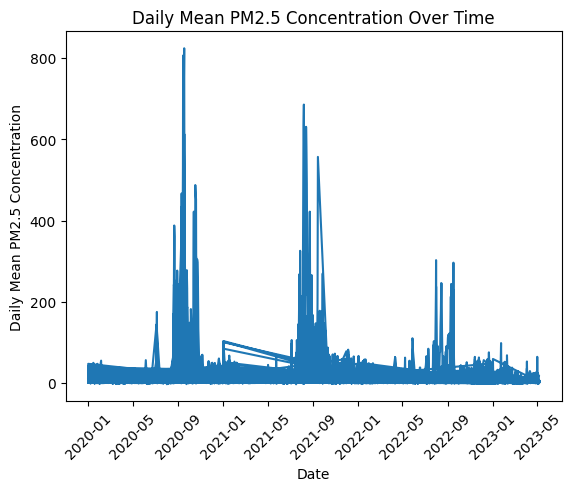

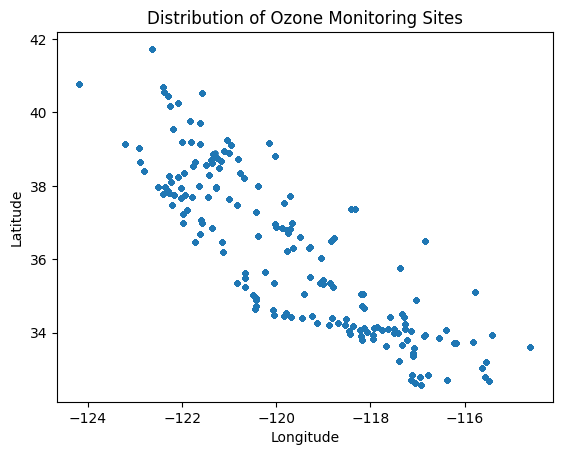

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV files
ozone_data_2023 = pd.read_csv('/drive/Shared drives/DATA245/Ozone_2023.csv')
pm25_data_2023 = pd.read_csv('/drive/Shared drives/DATA245/PM2.5_2023.csv')
ozone_data_2022 = pd.read_csv('/drive/Shared drives/DATA245/Ozone_2022.csv')
pm25_data_2022 = pd.read_csv('/drive/Shared drives/DATA245/PM2.5_2022.csv')
ozone_data_2021 = pd.read_csv('/drive/Shared drives/DATA245/Ozone_2021.csv')
pm25_data_2021 = pd.read_csv('/drive/Shared drives/DATA245/PM2.5_2021.csv')
ozone_data_2020 = pd.read_csv('/drive/Shared drives/DATA245/Ozone_2020.csv')
pm25_data_2020 = pd.read_csv('/drive/Shared drives/DATA245/PM2.5_2020.csv')
airnow_data = pd.read_csv('/drive/Shared drives/DATA245/airnow.csv')

ozone_data = pd.concat([ozone_data_2020, ozone_data_2021, ozone_data_2022, ozone_data_2023], ignore_index=True)
pm25_data = pd.concat([pm25_data_2020, pm25_data_2021, pm25_data_2022, pm25_data_2023], ignore_index=True)



# Plot a line chart of the daily mean PM2.5 concentration over time
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])
plt.plot(pm25_data['Date'], pm25_data['Daily Mean PM2.5 Concentration'])
plt.xlabel('Date')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.title('Daily Mean PM2.5 Concentration Over Time')
plt.xticks(rotation=45)
plt.show()



# Create a scatter plot of latitude and longitude of ozone monitoring sites
plt.scatter(ozone_data['SITE_LONGITUDE'], ozone_data['SITE_LATITUDE'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Ozone Monitoring Sites')
plt.show()






In [1]:
import folium

# Create a map centered at the average latitude and longitude
map_center = [ozone_data['SITE_LATITUDE'].mean(), ozone_data['SITE_LONGITUDE'].mean()]
map_ozone = folium.Map(location=map_center, zoom_start=10)

# Add markers for each ozone monitoring site
for index, row in ozone_data.iterrows():
    folium.Marker([row['SITE_LATITUDE'], row['SITE_LONGITUDE']]).add_to(map_ozone)

# Display the map
map_ozone



NameError: ignored

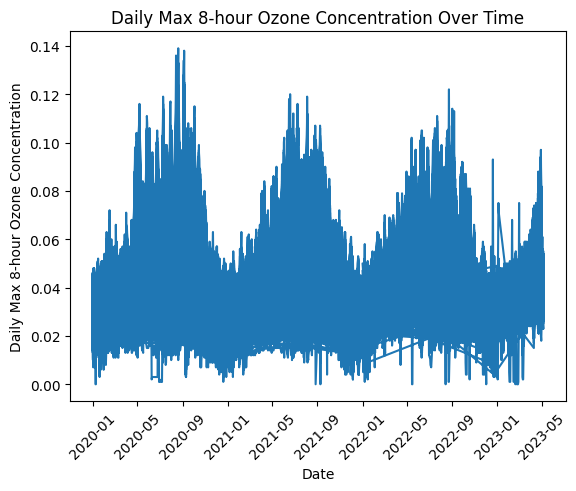

In [12]:
ozone_data['Date'] = pd.to_datetime(ozone_data['Date'])
plt.plot(ozone_data['Date'], ozone_data['Daily Max 8-hour Ozone Concentration'])
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour Ozone Concentration')
plt.title('Daily Max 8-hour Ozone Concentration Over Time')
plt.xticks(rotation=45)
plt.show()


In [ ]:
trial = ozone_data

In [4]:
import pandas as pd

# Load data from the CSV files
#ozone_data = pd.read_csv('/drive/Shared drives/DATA245/Ozone_California_data.csv')
#pm25_data = pd.read_csv('/drive/Shared drives/DATA245/PM2.5_California_data.csv')
#airnow_data = pd.read_csv('/drive/Shared drives/DATA245/airnow.csv')

# Preprocess the data
# Drop unnecessary columns from ozone_data and pm25_data
ozone_data.drop(columns=['Source', 'POC', 'UNITS', 'Site Name', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY'], inplace=True)
pm25_data.drop(columns=['Source', 'POC', 'UNITS', 'Site Name', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY'], inplace=True)

# Rename columns for consistency
ozone_data.rename(columns={'Daily Max 8-hour Ozone Concentration': 'Ozone', 'DAILY_AQI_VALUE_x': 'Ozone AQI'}, inplace=True)
pm25_data.rename(columns={'Daily Mean PM2.5 Concentration': 'PM2.5', 'DAILY_AQI_VALUE_y': 'PM2.5 AQI'}, inplace=True)

# Combine ozone_data and pm25_data into one dataframe
combined_data = pd.merge(ozone_data, pm25_data, on=['Date', 'Site ID'])

NameError: ignored

In [20]:
# Before label encoding
coords_before = list(zip(combined_data['Site ID'], combined_data['SITE_LATITUDE_x'], combined_data['SITE_LONGITUDE_x'], combined_data['SITE_LATITUDE_y'], combined_data['SITE_LONGITUDE_y']))

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the categorical column
combined_data['SITE_LATITUDE_x'] = label_encoder.fit_transform(combined_data['SITE_LATITUDE_x'])
combined_data['SITE_LONGITUDE_x'] = label_encoder.fit_transform(combined_data['SITE_LONGITUDE_x'])
combined_data['SITE_LATITUDE_y'] = label_encoder.fit_transform(combined_data['SITE_LATITUDE_y'])
combined_data['SITE_LONGITUDE_y'] = label_encoder.fit_transform(combined_data['SITE_LONGITUDE_y'])

# Print the encoded dataframe
combined_data.head()


NameError: ignored

In [22]:
# After label encoding
coords_after = list(zip(combined_data['Site ID'], combined_data['SITE_LATITUDE_x'], combined_data['SITE_LONGITUDE_x'], combined_data['SITE_LATITUDE_y'], combined_data['SITE_LONGITUDE_y']))

In [23]:
# Print the list of tuples
print("Coordinates before encoding:", coords_before)
print("Coordinates after encoding:", coords_after)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
# Create a DataFrame from the list of tuples

df = pd.DataFrame(coords_before, columns=['Site ID', 'Latitude (before)', 'Longitude (before)', 'Latitude (after)', 'Longitude (after)'])
df.drop(['Latitude (after)', 'Longitude (after)'], axis=1)

# Create a DataFrame from the list of tuples
df1 = pd.DataFrame(coords_after, columns=['Site ID', 'Latitude (before)', 'Longitude (before)', 'Latitude (after)', 'Longitude (after)'])
df1.drop(['Latitude (before)', 'Longitude (before)'], axis=1)

merged_df = pd.merge(df, df1, on='Site ID')

merged_trial_df = pd.merge(merged_df, trial[['Site ID', 'County']], on=['Site ID'], how='inner')

NameError: ignored

In [ ]:
merged_trial_df.head()

In [ ]:
# Export the DataFrame to a CSV file
merged_trial_df.to_csv('/drive/Shared drives/DATA245/coordinates_before_after_encoding.csv', index=False)

In [ ]:
combined_data['SITE_LATITUDE_x'].describe()

count    128640.000000
mean         84.071634
std          45.448991
min           0.000000
25%          43.000000
50%          88.000000
75%         123.000000
max         162.000000
Name: SITE_LATITUDE_x, dtype: float64

In [ ]:
combined_data.head()

,Date,Site ID,Ozone,DAILY_AQI_VALUE_x,DAILY_OBS_COUNT_x,SITE_LATITUDE_x,SITE_LONGITUDE_x,PM2.5,DAILY_AQI_VALUE_y,DAILY_OBS_COUNT_y,SITE_LATITUDE_y,SITE_LONGITUDE_y
0,01/01/2020,60010007,0.025,23,17,117,21,8.6,36,1,117,21
1,01/02/2020,60010007,0.017,16,17,117,21,4.5,19,1,117,21
2,01/03/2020,60010007,0.013,12,17,117,21,14.2,55,1,117,21
3,01/04/2020,60010007,0.028,26,17,117,21,10.9,45,1,117,21
4,01/05/2020,60010007,0.031,29,17,117,21,7.8,33,1,117,21


In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128640 entries, 0 to 128639
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               128640 non-null  object 
 1   Site ID            128640 non-null  int64  
 2   Ozone              128640 non-null  float64
 3   DAILY_AQI_VALUE_x  128640 non-null  int64  
 4   DAILY_OBS_COUNT_x  128640 non-null  int64  
 5   SITE_LATITUDE_x    128640 non-null  int64  
 6   SITE_LONGITUDE_x   128640 non-null  int64  
 7   PM2.5              128640 non-null  float64
 8   DAILY_AQI_VALUE_y  128640 non-null  int64  
 9   DAILY_OBS_COUNT_y  128640 non-null  int64  
 10  SITE_LATITUDE_y    128640 non-null  int64  
 11  SITE_LONGITUDE_y   128640 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 12.8+ MB


In [ ]:
combined_data.columns

Index(['Date', 'Site ID', 'Ozone', 'DAILY_AQI_VALUE_x', 'DAILY_OBS_COUNT_x',
       'SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'PM2.5', 'DAILY_AQI_VALUE_y',
       'DAILY_OBS_COUNT_y', 'SITE_LATITUDE_y', 'SITE_LONGITUDE_y'],
      dtype='object')

In [ ]:
combined_data.describe()

,Site ID,Ozone,DAILY_AQI_VALUE_x,DAILY_OBS_COUNT_x,SITE_LATITUDE_x,SITE_LONGITUDE_x,PM2.5,DAILY_AQI_VALUE_y,DAILY_OBS_COUNT_y,SITE_LATITUDE_y,SITE_LONGITUDE_y
count,7.103000e+03,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.0,7103.000000,7103.000000
mean,6.060047e+07,0.037456,34.722652,23.603829,36.172476,-119.819657,5.926313,23.941996,1.0,36.172476,-119.819657
std,3.127704e+05,0.007275,6.908009,1.493211,2.127606,1.895278,4.622077,16.501308,0.0,2.127606,1.895278
min,6.001001e+07,0.002000,2.000000,16.000000,32.578160,-122.818294,-2.600000,0.000000,1.0,32.578160,-122.818294
25%,6.037002e+07,0.033000,31.000000,24.000000,34.243100,-121.574684,2.900000,12.000000,1.0,34.243100,-121.574684
50%,6.065900e+07,0.038000,35.000000,24.000000,36.481870,-119.828400,4.800000,20.000000,1.0,36.481870,-119.828400
75%,6.083101e+07,0.042000,39.000000,24.000000,37.814781,-118.205000,7.800000,33.000000,1.0,37.814781,-118.205000
max,6.113100e+07,0.062000,74.000000,24.000000,41.726892,-115.483070,37.000000,105.000000,1.0,41.726892,-115.483070


In [6]:
import pandas as pd

# Load coordinates_before_encoding.csv
df_before_encoding = pd.read_csv('/content/drive/Shareddrives/DATA245/coordinates_before_encoding.csv')

# Load coordinates_before_after_encoding.csv
df_before_after_encoding = pd.read_csv('/content/drive/Shareddrives/DATA245/coordinates_before_after_encoding.csv')
# Load coordinates_after_encoding.csv
df_after_encoding = pd.read_csv('/content/drive/Shareddrives/DATA245/coordinates_after_encoding.csv')



In [7]:
# Print column names and information for coordinates_before_encoding.csv
print("----- coordinates_before_encoding.csv -----")
print("Column Names:")
print(df_before_encoding.columns)
print("\nData Information:")
print(df_before_encoding.info())

# Print column names and information for coordinates_before_after_encoding.csv
print("\n----- coordinates_before_after_encoding.csv -----")
print("Column Names:")
print(df_before_after_encoding.columns)
print("\nData Information:")
print(df_before_after_encoding.info())

# Print column names and information for coordinates_after_encoding.csv
print("\n----- coordinates_after_encoding.csv -----")
print("Column Names:")
print(df_after_encoding.columns)
print("\nData Information:")
print(df_after_encoding.info())


----- coordinates_before_encoding.csv -----
Column Names:
Index(['Site ID', 'Latitude (before)', 'Longitude (before)',
       'Latitude (after)', 'Longitude (after)'],
      dtype='object')

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128640 entries, 0 to 128639
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Site ID             128640 non-null  int64  
 1   Latitude (before)   128640 non-null  float64
 2   Longitude (before)  128640 non-null  float64
 3   Latitude (after)    128640 non-null  float64
 4   Longitude (after)   128640 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.9 MB
None

----- coordinates_before_after_encoding.csv -----
Column Names:
Index(['Site ID', 'Latitude (before)', 'Longitude (before)',
       'Latitude (after)', 'Longitude (after)', 'COUNTY'],
      dtype='object')

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

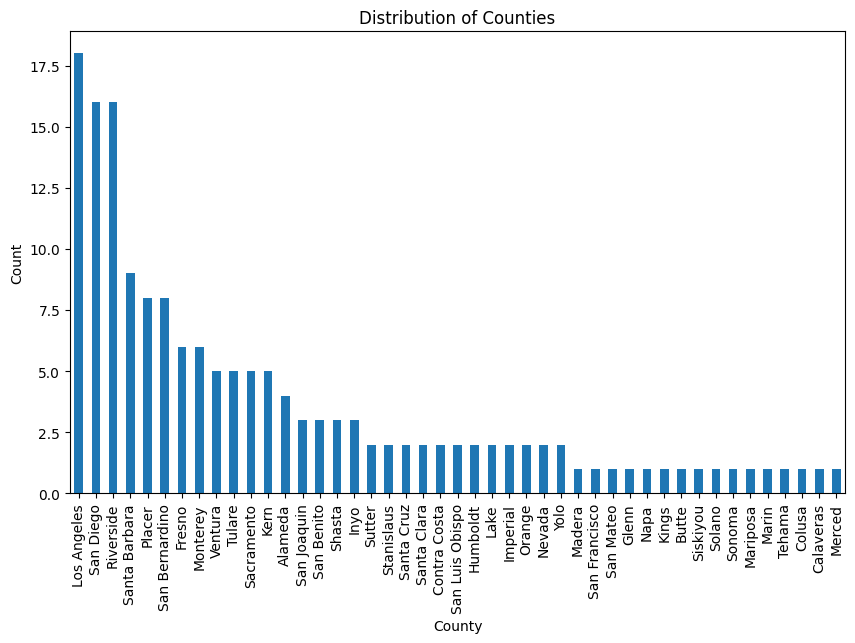

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in 'COUNTY'
county_counts = df_before_after_encoding['COUNTY'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
county_counts.plot(kind='bar')
plt.title('Distribution of Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()


In [9]:
import folium

# Create a Folium map object centered around the average latitude and longitude
center_lat = df_before_after_encoding['Latitude (before)'].mean()
center_lon = df_before_after_encoding['Longitude (before)'].mean()
map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add markers for each data point
for index, row in df_before_after_encoding.iterrows():
    lat = row['Latitude (before)']
    lon = row['Longitude (before)']
    folium.Marker([lat, lon]).add_to(map)

# Display the map
map


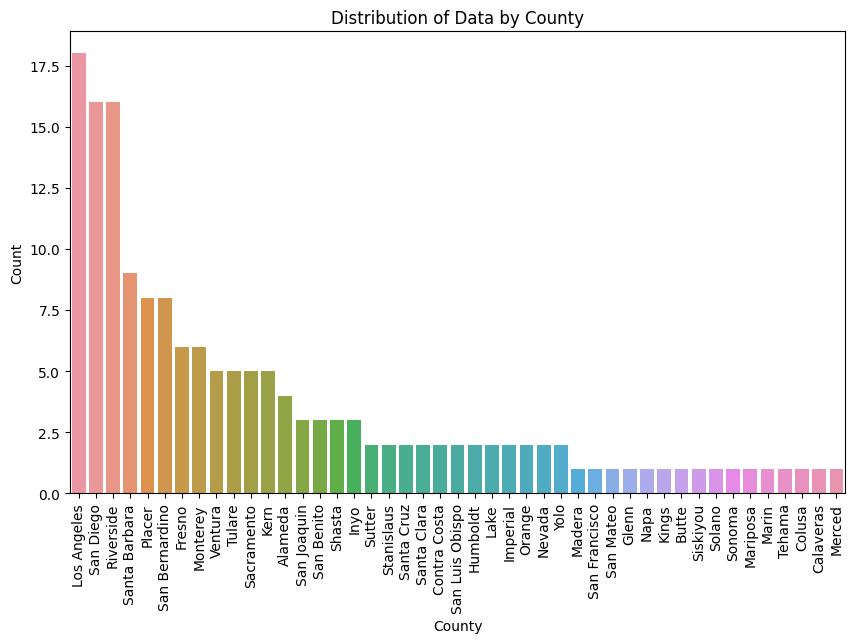

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Categorical Analysis - Bar Plot
county_counts = df_before_after_encoding['COUNTY'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=county_counts.index, y=county_counts.values)
plt.title('Distribution of Data by County')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()




In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Linear Regression NEW

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
train_data = combined_data[combined_data['Date'] < '02/28/2023']
test_data = combined_data[combined_data['Date'] >= '02/28/2023']

# Prepare the data for machine learning
X_train_ozone = train_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_train_ozone = train_data['DAILY_AQI_VALUE_x']
X_test_ozone = test_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_test_ozone = test_data['DAILY_AQI_VALUE_x']

X_train_pm25 = train_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_train_pm25 = train_data['DAILY_AQI_VALUE_y']
X_test_pm25 = test_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_test_pm25 = test_data['DAILY_AQI_VALUE_y']

# Train a linear regression model for Ozone AQI
lr_model_ozone = LinearRegression()
lr_model_ozone.fit(X_train_ozone, y_train_ozone)
lr_predictions_ozone = lr_model_ozone.predict(X_test_ozone)
lr_r2_ozone = r2_score(y_test_ozone, lr_predictions_ozone)

# Train a linear regression model for PM 2.5 AQI
lr_model_pm25 = LinearRegression()
lr_model_pm25.fit(X_train_pm25, y_train_pm25)
lr_predictions_pm25 = lr_model_pm25.predict(X_test_pm25)
lr_r2_pm25 = r2_score(y_test_pm25, lr_predictions_pm25)

print("R-squared score for Ozone AQI:", lr_r2_ozone)
print("R-squared score for PM 2.5 AQI:", lr_r2_pm25)

#Calculate MAE for Ozone AQI
lr_mae_ozone = mean_absolute_error(y_test_ozone, lr_predictions_ozone)

#Calculate MSE for Ozone AQI
lr_mse_ozone = mean_squared_error(y_test_ozone, lr_predictions_ozone)

#Calculate RMSE for Ozone AQI
lr_rmse_ozone = mean_squared_error(y_test_ozone, lr_predictions_ozone, squared=False)

#Calculate MAE for PM 2.5 AQI
lr_mae_pm25 = mean_absolute_error(y_test_pm25, lr_predictions_pm25)

#Calculate MSE for PM 2.5 AQI
lr_mse_pm25 = mean_squared_error(y_test_pm25, lr_predictions_pm25)

#Calculate RMSE for PM 2.5 AQI
lr_rmse_pm25 = mean_squared_error(y_test_pm25, lr_predictions_pm25, squared=False)

print("MAE score for Ozone AQI:", lr_mae_ozone)
print("MSE score for Ozone AQI:", lr_mse_ozone)
print("RMSE score for Ozone AQI:", lr_rmse_ozone)
print("MAE score for PM 2.5 AQI:", lr_mae_pm25)
print("MSE score for PM 2.5 AQI:", lr_mse_pm25)
print("RMSE score for PM 2.5 AQI:", lr_rmse_pm25)

R-squared score for Ozone AQI: 0.6775341616211465
R-squared score for PM 2.5 AQI: 0.5864454619462837
MAE score for Ozone AQI: 5.2101397624346975
MSE score for Ozone AQI: 211.75172373179834
RMSE score for Ozone AQI: 14.551691438860237
MAE score for PM 2.5 AQI: 4.561410540535399
MSE score for PM 2.5 AQI: 279.4981421554514
RMSE score for PM 2.5 AQI: 16.718197933851943


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train a linear regression model for Ozone AQI with hyperparameter tuning
lr_model_ozone = LinearRegression()
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False]}
lr_grid_ozone = GridSearchCV(lr_model_ozone, parameters, cv=10)
lr_grid_ozone.fit(X_train_ozone, y_train_ozone)

# Train a linear regression model for PM 2.5 AQI with hyperparameter tuning
lr_model_pm25 = LinearRegression()
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False]}
lr_grid_pm25 = GridSearchCV(lr_model_pm25, parameters, cv=10)
lr_grid_pm25.fit(X_train_pm25, y_train_pm25)

# Print the best hyperparameters and the corresponding R2 score
print("Best hyperparameters for Ozone AQI:", lr_grid_ozone.best_params_)
print("R-squared score with best hyperparameters for Ozone AQI:", lr_grid_ozone.best_score_)
print("Best hyperparameters for PM 2.5 AQI:", lr_grid_pm25.best_params_)
print("R-squared score with best hyperparameters for PM 2.5 AQI:", lr_grid_pm25.best_score_)

#Predict using the best hyperparameters for Ozone AQI
lr_predictions_ozone = lr_grid_ozone.predict(X_test_ozone)

#Calculate MAE for Ozone AQI with best hyperparameters
lr_mae_ozone = mean_absolute_error(y_test_ozone, lr_predictions_ozone)

#Calculate MSE for Ozone AQI with best hyperparameters
lr_mse_ozone = mean_squared_error(y_test_ozone, lr_predictions_ozone)

#Calculate RMSE for Ozone AQI with best hyperparameters
lr_rmse_ozone = mean_squared_error(y_test_ozone, lr_predictions_ozone, squared=False)

#Predict using the best hyperparameters for PM 2.5 AQI
lr_predictions_pm25 = lr_grid_pm25.predict(X_test_pm25)

#Calculate MAE for PM 2.5 AQI with best hyperparameters
lr_mae_pm25 = mean_absolute_error(y_test_pm25, lr_predictions_pm25)

#Calculate MSE for PM 2.5 AQI with best hyperparameters
lr_mse_pm25 = mean_squared_error(y_test_pm25, lr_predictions_pm25)

#Calculate RMSE for PM 2.5 AQI with best hyperparameters
lr_rmse_pm25 = mean_squared_error(y_test_pm25, lr_predictions_pm25, squared=False)

print("MAE score for Ozone AQI with best hyperparameters:", lr_mae_ozone)
print("MSE score for Ozone AQI with best hyperparameters:", lr_mse_ozone)
print("RMSE score for Ozone AQI with best hyperparameters:", lr_rmse_ozone)
print("MAE score for PM 2.5 AQI with best hyperparameters:", lr_mae_pm25)
print("MSE score for PM 2.5 AQI with best hyperparameters:", lr_mse_pm25)
print("RMSE score for PM 2.5 AQI with best hyperparameters:", lr_rmse_pm25)

Best hyperparameters for Ozone AQI: {'copy_X': True, 'fit_intercept': True}
R-squared score with best hyperparameters for Ozone AQI: 0.9911871824850476
Best hyperparameters for PM 2.5 AQI: {'copy_X': True, 'fit_intercept': True}
R-squared score with best hyperparameters for PM 2.5 AQI: 0.9591444076621853
MAE score for Ozone AQI with best hyperparameters: 5.2101397624346975
MSE score for Ozone AQI with best hyperparameters: 211.75172373179834
RMSE score for Ozone AQI with best hyperparameters: 14.551691438860237
MAE score for PM 2.5 AQI with best hyperparameters: 4.561410540535399
MSE score for PM 2.5 AQI with best hyperparameters: 279.4981421554514
RMSE score for PM 2.5 AQI with best hyperparameters: 16.718197933851943


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Prepare the data for machine learning
X = combined_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y = combined_data['DAILY_AQI_VALUE_x']

# Train a linear regression model with time-series cross-validation for Ozone AQI
lr_model_ozone = LinearRegression()
tscv = TimeSeriesSplit(n_splits=10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model_ozone.fit(X_train, y_train)
    lr_predictions_ozone = lr_model_ozone.predict(X_test)
    lr_r2_ozone = r2_score(y_test, lr_predictions_ozone)

# Prepare the data for machine learning
X = combined_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y = combined_data['DAILY_AQI_VALUE_y']

# Train a linear regression model with time-series cross-validation for PM 2.5 AQI
lr_model_pm25 = LinearRegression()
tscv = TimeSeriesSplit(n_splits=10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model_pm25.fit(X_train, y_train)
    lr_predictions_pm25 = lr_model_pm25.predict(X_test)
    lr_r2_pm25 = r2_score(y_test, lr_predictions_pm25)

print("R-squared score for Ozone AQI:", lr_r2_ozone)
print("R-squared score for PM 2.5 AQI:", lr_r2_pm25)

#Calculate MAE for Ozone AQI
lr_mae_ozone = mean_absolute_error(y_test, lr_predictions_ozone)

#Calculate MSE for Ozone AQI
lr_mse_ozone = mean_squared_error(y_test, lr_predictions_ozone)

#Calculate RMSE for Ozone AQI
lr_rmse_ozone = mean_squared_error(y_test, lr_predictions_ozone, squared=False)

#Calculate MAE for PM 2.5 AQI
lr_mae_pm25 = mean_absolute_error(y_test, lr_predictions_pm25)

#Calculate MSE for PM 2.5 AQI
lr_mse_pm25 = mean_squared_error(y_test, lr_predictions_pm25)

#Calculate RMSE for PM 2.5 AQI
lr_rmse_pm25 = mean_squared_error(y_test, lr_predictions_pm25, squared=False)

print("MAE score for Ozone AQI:", lr_mae_ozone)
print("MSE score for Ozone AQI:", lr_mse_ozone)
print("RMSE score for Ozone AQI:", lr_rmse_ozone)
print("MAE score for PM 2.5 AQI:", lr_mae_pm25)
print("MSE score for PM 2.5 AQI:", lr_mse_pm25)
print("RMSE score for PM 2.5 AQI:", lr_rmse_pm25)

R-squared score for Ozone AQI: 0.7844706639146697
R-squared score for PM 2.5 AQI: 0.7330639080958296
MAE score for Ozone AQI: 22.602210394525354
MSE score for Ozone AQI: 690.0524268828281
RMSE score for Ozone AQI: 26.26884898283189
MAE score for PM 2.5 AQI: 7.246511339896148
MSE score for PM 2.5 AQI: 70.20005461327098
RMSE score for PM 2.5 AQI: 8.37854728537537


Random Forest NEW

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
train_data = combined_data[combined_data['Date'] < '02/28/2023']
test_data = combined_data[combined_data['Date'] >= '02/28/2023']

# Prepare the data for machine learning
X_train_ozone = train_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_train_ozone = train_data['DAILY_AQI_VALUE_x']
X_test_ozone = test_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_test_ozone = test_data['DAILY_AQI_VALUE_x']

X_train_pm25 = train_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_train_pm25 = train_data['DAILY_AQI_VALUE_y']
X_test_pm25 = test_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_test_pm25 = test_data['DAILY_AQI_VALUE_y']

# Train a Random Forest Regression model for Ozone AQI
rf_model_ozone = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_ozone.fit(X_train_ozone, y_train_ozone)
rf_predictions_ozone = rf_model_ozone.predict(X_test_ozone)
rf_r2_ozone = r2_score(y_test_ozone, rf_predictions_ozone)

# Train a Random Forest Regression model for PM 2.5 AQI
rf_model_pm25 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_pm25.fit(X_train_pm25, y_train_pm25)
rf_predictions_pm25 = rf_model_pm25.predict(X_test_pm25)
rf_r2_pm25 = r2_score(y_test_pm25, rf_predictions_pm25)

print("R-squared score for Ozone AQI:", rf_r2_ozone)
print("R-squared score for PM 2.5 AQI:", rf_r2_pm25)

#Calculate MAE for Ozone AQI
rf_mae_ozone = mean_absolute_error(y_test_ozone, rf_predictions_ozone)

#Calculate MSE for Ozone AQI
rf_mse_ozone = mean_squared_error(y_test_ozone, rf_predictions_ozone)

#Calculate RMSE for Ozone AQI
rf_rmse_ozone = mean_squared_error(y_test_ozone, rf_predictions_ozone, squared=False)

#Calculate MAE for PM 2.5 AQI
rf_mae_pm25 = mean_absolute_error(y_test_pm25, rf_predictions_pm25)

#Calculate MSE for PM 2.5 AQI
rf_mse_pm25 = mean_squared_error(y_test_pm25, rf_predictions_pm25)

#Calculate RMSE for PM 2.5 AQI
rf_rmse_pm25 = mean_squared_error(y_test_pm25, rf_predictions_pm25, squared=False)

print("MAE score for Ozone AQI:", rf_mae_ozone)
print("MSE score for Ozone AQI:", rf_mse_ozone)
print("RMSE score for Ozone AQI:", rf_rmse_ozone)
print("MAE score for PM 2.5 AQI:", rf_mae_pm25)
print("MSE score for PM 2.5 AQI:", rf_mse_pm25)
print("RMSE score for PM 2.5 AQI:", rf_rmse_pm25)

R-squared score for Ozone AQI: 0.8403706093481483
R-squared score for PM 2.5 AQI: 0.9800068380094076
MAE score for Ozone AQI: 2.1268237651284734
MSE score for Ozone AQI: 104.82288232055667
RMSE score for Ozone AQI: 10.2383046604678
MAE score for PM 2.5 AQI: 0.22455293724785882
MSE score for PM 2.5 AQI: 13.512248368697035
RMSE score for PM 2.5 AQI: 3.6759010281422206


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Define the time-series cross-validator with a cut-off of 1 day
tscv = TimeSeriesSplit(n_splits=5)

# Split the data into training and testing sets using time-series cross-validation
for train_index, test_index in tscv.split(combined_data):
    train_data = combined_data.iloc[train_index]
    test_data = combined_data.iloc[test_index]
    
    # Prepare the data for machine learning
    X_train_ozone = train_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
    y_train_ozone = train_data['DAILY_AQI_VALUE_x']
    X_test_ozone = test_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
    y_test_ozone = test_data['DAILY_AQI_VALUE_x']

    X_train_pm25 = train_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
    y_train_pm25 = train_data['DAILY_AQI_VALUE_y']
    X_test_pm25 = test_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
    y_test_pm25 = test_data['DAILY_AQI_VALUE_y']

    # Train a Random Forest Regression model for Ozone AQI
    rf_model_ozone = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_ozone.fit(X_train_ozone, y_train_ozone)
    rf_predictions_ozone = rf_model_ozone.predict(X_test_ozone)
    rf_r2_ozone = r2_score(y_test_ozone, rf_predictions_ozone)

    # Train a Random Forest Regression model for PM 2.5 AQI
    rf_model_pm25 = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_pm25.fit(X_train_pm25, y_train_pm25)
    rf_predictions_pm25 = rf_model_pm25.predict(X_test_pm25)
    rf_r2_pm25 = r2_score(y_test_pm25, rf_predictions_pm25)

    print("R-squared score for Ozone AQI:", rf_r2_ozone)
    print("R-squared score for PM 2.5 AQI:", rf_r2_pm25)

    #Calculate MAE for Ozone AQI
    rf_mae_ozone = mean_absolute_error(y_test_ozone, rf_predictions_ozone)

    #Calculate MSE for Ozone AQI
    rf_mse_ozone = mean_squared_error(y_test_ozone, rf_predictions_ozone)

    #Calculate RMSE for Ozone AQI
    rf_rmse_ozone = mean_squared_error(y_test_ozone, rf_predictions_ozone, squared=False)

    #Calculate MAE for PM 2.5 AQI
    rf_mae_pm25 = mean_absolute_error(y_test_pm25, rf_predictions_pm25)

    #Calculate MSE for PM 2.5 AQI
    rf_mse_pm25 = mean_squared_error(y_test_pm25, rf_predictions_pm25)

    #Calculate RMSE for PM 2.5 AQI
    rf_rmse_pm25 = mean_squared_error(y_test_pm25, rf_predictions_pm25, squared=False)

    print("MAE score for Ozone AQI:", rf_mae_ozone)
    print("MSE score for Ozone AQI:", rf_mse_ozone)
    print("RMSE score for Ozone AQI:", rf_rmse_ozone)
    print("MAE score for PM2.5 AQI:", rf_mae_pm25)
    print("MSE score for PM2.5 AQI:", rf_mse_pm25)
    print("RMSE score for PM2.5 AQI:", rf_rmse_pm25)

R-squared score for Ozone AQI: 0.9999889902364401
R-squared score for PM 2.5 AQI: 0.9999769039031571
MAE score for Ozone AQI: 0.0037159514925373107
MSE score for Ozone AQI: 0.007707196828358206
RMSE score for Ozone AQI: 0.08779064203181457
MAE score for PM2.5 AQI: 0.00452145522388059
MSE score for PM2.5 AQI: 0.019143311567164166
RMSE score for PM2.5 AQI: 0.13835935663034923
R-squared score for Ozone AQI: 0.9999999149837422
R-squared score for PM 2.5 AQI: 0.9998704731992097
MAE score for Ozone AQI: 0.00010541044776119475
MSE score for Ozone AQI: 5.611940298507574e-05
RMSE score for Ozone AQI: 0.007491288472958156
MAE score for PM2.5 AQI: 0.004028451492537303
MSE score for PM2.5 AQI: 0.08181710354477618
RMSE score for PM2.5 AQI: 0.2860368919296533
R-squared score for Ozone AQI: 0.9999999142982329
R-squared score for PM 2.5 AQI: 0.9999993164288208
MAE score for Ozone AQI: 7.649253731343304e-05
MSE score for Ozone AQI: 4.3106343283580846e-05
RMSE score for Ozone AQI: 0.006565542116503469
M

XGBoost NEW

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
train_data = combined_data[combined_data['Date'] < '02/28/2023']
test_data = combined_data[combined_data['Date'] >= '02/28/2023']

# Prepare the data for machine learning
X_train_ozone = train_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_train_ozone = train_data['DAILY_AQI_VALUE_x']
X_test_ozone = test_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_test_ozone = test_data['DAILY_AQI_VALUE_x']

X_train_pm25 = train_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_train_pm25 = train_data['DAILY_AQI_VALUE_y']
X_test_pm25 = test_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_test_pm25 = test_data['DAILY_AQI_VALUE_y']

# Train an XGBoost model for Ozone AQI
xgb_model_ozone = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_ozone.fit(X_train_ozone, y_train_ozone)
xgb_predictions_ozone = xgb_model_ozone.predict(X_test_ozone)
xgb_r2_ozone = r2_score(y_test_ozone, xgb_predictions_ozone)

# Train an XGBoost model for PM 2.5 AQI
xgb_model_pm25 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_pm25.fit(X_train_pm25, y_train_pm25)
xgb_predictions_pm25 = xgb_model_pm25.predict(X_test_pm25)
xgb_r2_pm25 = r2_score(y_test_pm25, xgb_predictions_pm25)

print("R-squared score for Ozone AQI:", xgb_r2_ozone)
print("R-squared score for PM 2.5 AQI:", xgb_r2_pm25)

#Calculate MAE for Ozone AQI
xgb_mae_ozone = mean_absolute_error(y_test_ozone, xgb_predictions_ozone)

#Calculate MSE for Ozone AQI
xgb_mse_ozone = mean_squared_error(y_test_ozone, xgb_predictions_ozone)

#Calculate RMSE for Ozone AQI
xgb_rmse_ozone = mean_squared_error(y_test_ozone, xgb_predictions_ozone, squared=False)

#Calculate MAE for PM 2.5 AQI
xgb_mae_pm25 = mean_absolute_error(y_test_pm25, xgb_predictions_pm25)

#Calculate MSE for PM 2.5 AQI
xgb_mse_pm25 = mean_squared_error(y_test_pm25, xgb_predictions_pm25)

#Calculate RMSE for PM 2.5 AQI
xgb_rmse_pm25 = mean_squared_error(y_test_pm25, xgb_predictions_pm25, squared=False)

print("MAE score for Ozone AQI:", xgb_mae_ozone)
print("MSE score for Ozone AQI:", xgb_mse_ozone)
print("RMSE score for Ozone AQI:", xgb_rmse_ozone)
print("MAE score for PM 2.5 AQI:", xgb_mae_pm25)
print("MSE score for PM 2.5 AQI:", xgb_mse_pm25)
print("RMSE score for PM 2.5 AQI:", xgb_rmse_pm25)

R-squared score for Ozone AQI: 0.8559994497983197
R-squared score for PM 2.5 AQI: 0.9803899389935226
MAE score for Ozone AQI: 1.9127894287859495
MSE score for Ozone AQI: 94.55998463846205
RMSE score for Ozone AQI: 9.724195835052997
MAE score for PM 2.5 AQI: 0.22067695808557833
MSE score for PM 2.5 AQI: 13.253332062707473
RMSE score for PM 2.5 AQI: 3.6405126098816734


XGBoost Final

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Prepare the data for machine learning
X = combined_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y = combined_data['DAILY_AQI_VALUE_x']

# Perform time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train an XGBoost model
    xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    xgb_model.fit(X_train, y_train)

    # Make predictions
    xgb_predictions = xgb_model.predict(X_test)

    # Calculate metrics
    xgb_r2 = r2_score(y_test, xgb_predictions)
    xgb_mae = mean_absolute_error(y_test, xgb_predictions)
    xgb_mse = mean_squared_error(y_test, xgb_predictions)
    xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

    # Print the results
    print("R-squared score:", xgb_r2)
    print("MAE score:", xgb_mae)
    print("MSE score:", xgb_mse)
    print("RMSE score:", xgb_rmse)

    # Use the trained model to make a prediction for tomorrow's AQI value
    X_pred = np.array([[117, 21, 0.025]])
    y_pred = xgb_model.predict(X_pred)
    print("Tomorrow's Ozone AQI prediction:", y_pred)

R-squared score: 0.9999955498087763
MAE score: 0.003326899191336845
MSE score: 0.003115280314472282
RMSE score: 0.05581469622305833
Tomorrow's Ozone AQI prediction: [22.99961]
R-squared score: 0.9999999325719807
MAE score: 0.0014357363554968763
MSE score: 4.450937132377028e-05
RMSE score: 0.006671534405500003
Tomorrow's Ozone AQI prediction: [22.999443]
R-squared score: 0.9999998857645529
MAE score: 0.0012653907889555861
MSE score: 5.745823647324899e-05
RMSE score: 0.007580121138428395
Tomorrow's Ozone AQI prediction: [22.999435]
R-squared score: 0.9999999857063057
MAE score: 0.0013195460971528246
MSE score: 8.717087885386576e-06
RMSE score: 0.002952471487650063
Tomorrow's Ozone AQI prediction: [22.99937]
R-squared score: 0.9999999932941158
MAE score: 0.0010460879931698983
MSE score: 1.686136735813299e-06
RMSE score: 0.0012985132790284816
Tomorrow's Ozone AQI prediction: [22.999456]


In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# Prepare the data for machine learning
X = combined_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y = combined_data['DAILY_AQI_VALUE_y']

# Perform time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train an XGBoost model
    xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    xgb_model.fit(X_train, y_train)

    # Make predictions
    xgb_predictions = xgb_model.predict(X_test)

    # Calculate metrics
    xgb_r2 = r2_score(y_test, xgb_predictions)
    xgb_mae = mean_absolute_error(y_test, xgb_predictions)
    xgb_mse = mean_squared_error(y_test, xgb_predictions)
    xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

    # Print the results
    print("R-squared score:", xgb_r2)
    print("MAE score:", xgb_mae)
    print("MSE score:", xgb_mse)
    print("RMSE score:", xgb_rmse)

    # Use the trained model to make a prediction for tomorrow's AQI value
    X_pred = np.array([[117, 21, 10.2]])
    y_pred = xgb_model.predict(X_pred)
    print("Tomorrow's PM 2.5 AQI prediction:", y_pred)

R-squared score: 0.9999638480268741
MAE score: 0.011823839237982992
MSE score: 0.029964737765990276
RMSE score: 0.17310325752564645
Tomorrow's PM 2.5 AQI prediction: [42.99874]
R-squared score: 0.9999280434611126
MAE score: 0.006680053636108511
MSE score: 0.045452180992288906
RMSE score: 0.21319517112798053
Tomorrow's PM 2.5 AQI prediction: [42.998558]
R-squared score: 0.9999978292185137
MAE score: 0.003328916366488339
MSE score: 0.00109510979014233
RMSE score: 0.03309244309721375
Tomorrow's PM 2.5 AQI prediction: [42.998566]
R-squared score: 0.9999832640646245
MAE score: 0.0023694140169597507
MSE score: 0.0065537576252396494
RMSE score: 0.08095528163893724
Tomorrow's PM 2.5 AQI prediction: [42.99887]
R-squared score: 0.9999980581304622
MAE score: 0.0013228634415357722
MSE score: 0.0006785241308449888
RMSE score: 0.026048495750138602
Tomorrow's PM 2.5 AQI prediction: [42.998707]


SVM NEW

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
train_data = combined_data[combined_data['Date'] < '02/30/2023']
test_data = combined_data[combined_data['Date'] >= '02/30/2023']

# Prepare the data for machine learning
X_train_ozone = train_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_train_ozone = train_data['DAILY_AQI_VALUE_x']
X_test_ozone = test_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_test_ozone = test_data['DAILY_AQI_VALUE_x']

X_train_pm25 = train_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_train_pm25 = train_data['DAILY_AQI_VALUE_y']
X_test_pm25 = test_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_test_pm25 = test_data['DAILY_AQI_VALUE_y']

# Feature scaling
scaler = StandardScaler()
X_train_ozone = scaler.fit_transform(X_train_ozone)
X_test_ozone = scaler.transform(X_test_ozone)
X_train_pm25 = scaler.fit_transform(X_train_pm25)
X_test_pm25 = scaler.transform(X_test_pm25)

# Feature selection
selector_ozone = SelectKBest(f_regression, k=2)
X_train_ozone = selector_ozone.fit_transform(X_train_ozone, y_train_ozone)
X_test_ozone = selector_ozone.transform(X_test_ozone)

selector_pm25 = SelectKBest(f_regression, k=2)
X_train_pm25 = selector_pm25.fit_transform(X_train_pm25, y_train_pm25)
X_test_pm25 = selector_pm25.transform(X_test_pm25)

# Hyperparameter tuning
# Define the parameter grid for SVM
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf', 'sigmoid']}

# Train an SVM model for Ozone AQI using GridSearchCV
svm_model_ozone = SVR()
svm_grid_ozone = GridSearchCV(svm_model_ozone, parameters, cv=10)
svm_grid_ozone.fit(X_train_ozone, y_train_ozone)
svm_predictions_ozone = svm_grid_ozone.predict(X_test_ozone)
svm_r2_ozone = r2_score(y_test_ozone, svm_predictions_ozone)

# Train an SVM model for PM 2.5 AQI using GridSearchCV
svm_model_pm25 = SVR()
svm_grid_pm25 = GridSearchCV(svm_model_pm25, parameters, cv=10)
svm_grid_pm25.fit(X_train_pm25, y_train_pm25)
svm_predictions_pm25 = svm_grid_pm25.predict(X_test_pm25)
svm_r2_pm25 = r2_score(y_test_pm25, svm_predictions_pm25)

print("R-squared score for Ozone AQI (SVM):", svm_r2_ozone)
print("R-squared score for PM 2.5 AQI (SVM):", svm_r2_pm25)

#Calculate MAE for Ozone AQI (SVM)
svm_mae_ozone = mean_absolute_error(y_test_ozone, svm_predictions_ozone)

#Calculate MSE for Ozone AQI (SVM)
svm_mse_ozone = mean_squared_error(y_test_ozone, svm_predictions_ozone)

#Calculate RMSE for Ozone AQI (SVM)
svm_rmse_ozone = mean_squared_error(y_test_ozone, svm_predictions_ozone, squared=False)

#Calculate MAE for PM 2.5 AQI (SVM)
svm_mae_pm25 = mean_absolute_error(y_test_pm25, svm_predictions_pm25)

#Calculate MSE for PM 2.5 AQI (SVM)
svm_mse_pm25 = mean_squared_error(y_test_pm25, svm_predictions_pm25)

#Calculate RMSE for PM 2.5 AQI (SVM)
svm_rmse_pm25 = mean_squared_error(y_test_pm25, svm_predictions_pm25, squared=False)

print("MAE score for Ozone AQI (SVM):", svm_mae_ozone)
print("MSE score for Ozone AQI (SVM):", svm_mse_ozone)
print("RMSE score for Ozone AQI (SVM):", svm_rmse_ozone)
print("MAE score for PM 2.5 AQI (SVM):", svm_mae_pm25)
print("MSE score for PM 2.5 AQI (SVM):", svm_mse_pm25)
print("RMSE score for PM 2.5 AQI (SVM):", svm_rmse_pm25)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# (Data preparation and feature scaling code remains unchanged)
# Split the data into training and testing sets
train_data = combined_data[combined_data['Date'] < '02/30/2023']
test_data = combined_data[combined_data['Date'] >= '02/30/2023']

# Prepare the data for machine learning
X_train_ozone = train_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_train_ozone = train_data['DAILY_AQI_VALUE_x']
X_test_ozone = test_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_test_ozone = test_data['DAILY_AQI_VALUE_x']

X_train_pm25 = train_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_train_pm25 = train_data['DAILY_AQI_VALUE_y']
X_test_pm25 = test_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_test_pm25 = test_data['DAILY_AQI_VALUE_y']

# Feature scaling
scaler = StandardScaler()
X_train_ozone = scaler.fit_transform(X_train_ozone)
X_test_ozone = scaler.transform(X_test_ozone)
X_train_pm25 = scaler.fit_transform(X_train_pm25)
X_test_pm25 = scaler.transform(X_test_pm25)

# Feature selection
selector_ozone = SelectKBest(f_regression, k=2)
X_train_ozone = selector_ozone.fit_transform(X_train_ozone, y_train_ozone)
X_test_ozone = selector_ozone.transform(X_test_ozone)

selector_pm25 = SelectKBest(f_regression, k=2)
X_train_pm25 = selector_pm25.fit_transform(X_train_pm25, y_train_pm25)
X_test_pm25 = selector_pm25.transform(X_test_pm25)

# Hyperparameter tuning
# Define the parameter grid for SVM
parameters = {'C': np.logspace(-2, 2, 5),
              'gamma': np.logspace(-4, 0, 5),
              'kernel': ['linear', 'rbf']}

# Train an SVM model for Ozone AQI using RandomizedSearchCV
svm_model_ozone = SVR()
svm_rand_ozone = RandomizedSearchCV(svm_model_ozone, parameters, n_iter=20, cv=5, random_state=42)
svm_rand_ozone.fit(X_train_ozone, y_train_ozone)
svm_predictions_ozone = svm_rand_ozone.predict(X_test_ozone)
svm_r2_ozone = r2_score(y_test_ozone, svm_predictions_ozone)

# Train an SVM model for PM 2.5 AQI using RandomizedSearchCV
svm_model_pm25 = SVR()
svm_rand_pm25 = RandomizedSearchCV(svm_model_pm25, parameters, n_iter=20, cv=5, random_state=42)
svm_rand_pm25.fit(X_train_pm25, y_train_pm25)
svm_predictions_pm25 = svm_rand_pm25.predict(X_test_pm25)
svm_r2_pm25 = r2_score(y_test_pm25, svm_predictions_pm25)

# Model evaluation
print("R-squared score for Ozone AQI (SVM):", svm_r2_ozone)
print("R-squared score for PM 2.5 AQI (SVM):", svm_r2_pm25)

svm_mae_ozone = mean_absolute_error(y_test_ozone, svm_predictions_ozone)
svm_mse_ozone = mean_squared_error(y_test_ozone, svm_predictions_ozone)
svm_rmse_ozone = mean_squared_error(y_test_ozone, svm_predictions_ozone, squared=False)

svm_mae_pm25 = mean_absolute_error(y_test_pm25, svm_predictions_pm25)
svm_mse_pm25 = mean_squared_error(y_test_pm25, svm_predictions_pm25)
svm_rmse_pm25 = mean_squared_error(y_test_pm25, svm_predictions_pm25, squared=False)

print("MAE score for Ozone AQI (SVM):", svm_mae_ozone)
print("MSE score for Ozone AQI (SVM):", svm_mse_ozone)
print("RMSE score for Ozone AQI (SVM):", svm_rmse_ozone)
print("MAE score for PM 2.5 AQI (SVM):", svm_mae_pm25)
print("MSE score for PM 2.5 AQI (SVM):", svm_mse_pm25)
print("RMSE score for PM 2.5 AQI (SVM):", svm_rmse_pm25)

LSTM NEW

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import r2_score

# Normalize the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_train_ozone = scaler.fit_transform(X_train_ozone)
# X_test_ozone = scaler.transform(X_test_ozone)

# # Reshape the data for LSTM input
# X_train_ozone = X_train_ozone.reshape((X_train_ozone.shape[0], 1, X_train_ozone.shape[1]))
# X_test_ozone = X_test_ozone.reshape((X_test_ozone.shape[0], 1, X_test_ozone.shape[1]))

# Define the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train an LSTM model for Ozone AQI
model_ozone = create_model(X_train_ozone.shape[1:])
history_ozone = model_ozone.fit(X_train_ozone, y_train_ozone, epochs=50, batch_size=32, validation_data=(X_test_ozone, y_test_ozone), verbose=0)

# Predict using the trained model
lstm_predictions_ozone = model_ozone.predict(X_test_ozone)

# Calculate evaluation metrics for Ozone AQI (LSTM)
lstm_r2_ozone = r2_score(y_test_ozone, lstm_predictions_ozone)
lstm_mae_ozone = mean_absolute_error(y_test_ozone, lstm_predictions_ozone)
lstm_mse_ozone = mean_squared_error(y_test_ozone, lstm_predictions_ozone)
lstm_rmse_ozone = mean_squared_error(y_test_ozone, lstm_predictions_ozone, squared=False)

print("R-squared score for Ozone AQI (LSTM):", lstm_r2_ozone)
print("MAE score for Ozone AQI (LSTM):", lstm_mae_ozone)
print("MSE score for Ozone AQI (LSTM):", lstm_mse_ozone)
print("RMSE score for Ozone AQI (LSTM):", lstm_rmse_ozone)


3463/3463 [==============================] - 6s 2ms/step
R-squared score for Ozone AQI (LSTM): 0.6987491500933589
MAE score for Ozone AQI (LSTM): 4.927529907322532
MSE score for Ozone AQI (LSTM): 197.82060346018886
RMSE score for Ozone AQI (LSTM): 14.064871256438463


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

# Define a function to create an LSTM model
def create_model_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
    

# Prepare the data for LSTM
X_train_pm25 = X_train_pm25.values.reshape((X_train_pm25.shape[0], 1, X_train_pm25.shape[1]))
X_test_pm25 = X_test_pm25.values.reshape((X_test_pm25.shape[0], 1, X_test_pm25.shape[1]))

# Train an LSTM model for PM 2.5 AQI
model_pm25 = create_model_lstm(X_train_pm25.shape[1:])
early_stopping_pm25 = EarlyStopping(monitor='val_loss', patience=5)
history_pm25 = model_pm25.fit(X_train_pm25, y_train_pm25, epochs=50, batch_size=32,
                              validation_data=(X_test_pm25, y_test_pm25),
                              callbacks=[early_stopping_pm25], verbose=0)

# Make predictions using the trained LSTM model for PM 2.5 AQI
lstm_predictions_pm25 = model_pm25.predict(X_test_pm25)
lstm_r2_pm25 = r2_score(y_test_pm25, lstm_predictions_pm25)

# Calculate evaluation metrics for PM 2.5 AQI (LSTM)
lstm_mae_pm25 = mean_absolute_error(y_test_pm25, lstm_predictions_pm25)
lstm_mse_pm25 = mean_squared_error(y_test_pm25, lstm_predictions_pm25)
lstm_rmse_pm25 = mean_squared_error(y_test_pm25, lstm_predictions_pm25, squared=False)

print("R-squared score for PM 2.5 AQI (LSTM):", lstm_r2_pm25)
print("MAE score for PM 2.5 AQI (LSTM):", lstm_mae_pm25)
print("MSE score for PM 2.5 AQI (LSTM):", lstm_mse_pm25)
print("RMSE score for PM 2.5 AQI (LSTM):", lstm_rmse_pm25)

3463/3463 [==============================] - 6s 2ms/step
R-squared score for PM 2.5 AQI (LSTM): 0.9535976347636015
MAE score for PM 2.5 AQI (LSTM): 1.026233345989656
MSE score for PM 2.5 AQI (LSTM): 31.360736449003774
RMSE score for PM 2.5 AQI (LSTM): 5.600065753989302


NEURAL NETWORK NEW

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
train_data = combined_data[combined_data['Date'] < '02/30/2023']
test_data = combined_data[combined_data['Date'] >= '02/30/2023']

# Prepare the data for machine learning
X_train_ozone = train_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_train_ozone = train_data['DAILY_AQI_VALUE_x']
X_test_ozone = test_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_test_ozone = test_data['DAILY_AQI_VALUE_x']

X_train_pm25 = train_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_train_pm25 = train_data['DAILY_AQI_VALUE_y']
X_test_pm25 = test_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_test_pm25 = test_data['DAILY_AQI_VALUE_y']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_ozone_scaled = scaler.fit_transform(X_train_ozone)
X_test_ozone_scaled = scaler.transform(X_test_ozone)

X_train_pm25_scaled = scaler.fit_transform(X_train_pm25)
X_test_pm25_scaled = scaler.transform(X_test_pm25)

# Define the NN model for Ozone AQI
def create_model_ozone(input_shape):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=input_shape))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the NN model for Ozone AQI
model_ozone = create_model_ozone(X_train_ozone_scaled.shape[1:])
history_ozone = model_ozone.fit(X_train_ozone_scaled, y_train_ozone, epochs=50, batch_size=32, validation_data=(X_test_ozone_scaled, y_test_ozone), verbose=0)

# Predict using the trained model
nn_predictions_ozone = model_ozone.predict(X_test_ozone_scaled)

# Calculate evaluation metrics for Ozone AQI (NN)
nn_r2_ozone = r2_score(y_test_ozone, nn_predictions_ozone)
nn_mae_ozone = mean_absolute_error(y_test_ozone, nn_predictions_ozone)
nn_mse_ozone = mean_squared_error(y_test_ozone, nn_predictions_ozone)
nn_rmse_ozone = mean_squared_error(y_test_ozone, nn_predictions_ozone, squared=False)

print("R-squared score for Ozone AQI (NN):", nn_r2_ozone)
print("MAE score for Ozone AQI (NN):", nn_mae_ozone)
print("MSE score for Ozone AQI (NN):", nn_mse_ozone)
print("RMSE score for Ozone AQI (NN):", nn_rmse_ozone)

# Define the NN model for PM 2.5 AQI
def create_model_pm25(input_shape):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=input_shape))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the NN model for PM 2.5 AQI
model_pm25 = create_model_pm25(X_train_pm25_scaled.shape[1:])
history_pm25 = model_pm25.fit(X_train_pm25_scaled, y_train_pm25, epochs=50, batch_size=32, validation_data=(X_test_pm25_scaled, y_test_pm25), verbose=0)

# Predict using the trained model
nn_predictions_pm25 = model_pm25.predict(X_test_pm25_scaled)

# Calculate evaluation metrics for PM 2.5 AQI (NN)
nn_r2_pm25 = r2_score(y_test_pm25, nn_predictions_pm25)
nn_mae_pm25 = mean_absolute_error(y_test_pm25, nn_predictions_pm25)
nn_mse_pm25 = mean_squared_error(y_test_pm25, nn_predictions_pm25)
nn_rmse_pm25 = mean_squared_error(y_test_pm25, nn_predictions_pm25, squared=False)

print("R-squared score for PM 2.5 AQI (NN):", nn_r2_pm25)
print("MAE score for PM 2.5 AQI (NN):", nn_mae_pm25)
print("MSE score for PM 2.5 AQI (NN):", nn_mse_pm25)
print("RMSE score for PM 2.5 AQI (NN):", nn_rmse_pm25)


3463/3463 [==============================] - 4s 1ms/step
R-squared score for Ozone AQI (NN): 0.6210579852720088
MAE score for Ozone AQI (NN): 5.507553148919058
MSE score for Ozone AQI (NN): 248.8375984769576
RMSE score for Ozone AQI (NN): 15.774587109555597
3463/3463 [==============================] - 4s 1ms/step
R-squared score for PM 2.5 AQI (NN): 0.9277819863078642
MAE score for PM 2.5 AQI (NN): 0.7858657215506283
MSE score for PM 2.5 AQI (NN): 48.80807438869676
RMSE score for PM 2.5 AQI (NN): 6.986277577415369


Linear with Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
train_data = combined_data[combined_data['Date'] < '02/30/2023']
test_data = combined_data[combined_data['Date'] >= '02/30/2023']

# Prepare the data for machine learning
X_train_ozone = train_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_train_ozone = train_data['DAILY_AQI_VALUE_x']
X_test_ozone = test_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'Ozone']]
y_test_ozone = test_data['DAILY_AQI_VALUE_x']

X_train_pm25 = train_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_train_pm25 = train_data['DAILY_AQI_VALUE_y']
X_test_pm25 = test_data[['SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'PM2.5']]
y_test_pm25 = test_data['DAILY_AQI_VALUE_y']

#Train an Adaboost model for Ozone AQI with Linear Regression as base estimator
ada_model_ozone = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
ada_model_ozone.fit(X_train_ozone, y_train_ozone)
ada_predictions_ozone = ada_model_ozone.predict(X_test_ozone)
ada_r2_ozone = r2_score(y_test_ozone, ada_predictions_ozone)

#Train an Adaboost model for PM 2.5 AQI with Linear Regression as base estimator
ada_model_pm25 = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
ada_model_pm25.fit(X_train_pm25, y_train_pm25)
ada_predictions_pm25 = ada_model_pm25.predict(X_test_pm25)
ada_r2_pm25 = r2_score(y_test_pm25, ada_predictions_pm25)

print("R-squared score for Ozone AQI (Adaboost with Linear Regression):", ada_r2_ozone)
print("R-squared score for PM 2.5 AQI (Adaboost with Linear Regression):", ada_r2_pm25)

#Calculate MAE for Ozone AQI
ada_mae_ozone = mean_absolute_error(y_test_ozone, ada_predictions_ozone)

#Calculate MSE for Ozone AQI
ada_mse_ozone = mean_squared_error(y_test_ozone, ada_predictions_ozone)

#Calculate RMSE for Ozone AQI
ada_rmse_ozone = mean_squared_error(y_test_ozone, ada_predictions_ozone, squared=False)

#Calculate MAE for PM 2.5 AQI
ada_mae_pm25 = mean_absolute_error(y_test_pm25, ada_predictions_pm25)

#Calculate MSE for PM 2.5 AQI
ada_mse_pm25 = mean_squared_error(y_test_pm25, ada_predictions_pm25)

#Calculate RMSE for PM 2.5 AQI
ada_rmse_pm25 = mean_squared_error(y_test_pm25, ada_predictions_pm25, squared=False)

print("MAE score for Ozone AQI (Adaboost with Linear Regression):", ada_mae_ozone)
print("MSE score for Ozone AQI (Adaboost with Linear Regression):", ada_mse_ozone)
print("RMSE score for Ozone AQI (Adaboost with Linear Regression):", ada_rmse_ozone)
print("MAE score for PM 2.5 AQI (Adaboost with Linear Regression):", ada_mae_pm25)
print("MSE score for PM 2.5 AQI (Adaboost with Linear Regression):", ada_mse_pm25)
print("RMSE score for PM 2.5 AQI (Adaboost with Linear Regression):", ada_rmse_pm25)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R-squared score for Ozone AQI (Adaboost with Linear Regression): 0.7860274945053976
R-squared score for PM 2.5 AQI (Adaboost with Linear Regression): 0.6802477503353441
MAE score for Ozone AQI (Adaboost with Linear Regression): 5.468598164194392
MSE score for Ozone AQI (Adaboost with Linear Regression): 140.50805225594718
RMSE score for Ozone AQI (Adaboost with Linear Regression): 11.85360925017976
MAE score for PM 2.5 AQI (Adaboost with Linear Regression): 4.744794306957116
MSE score for PM 2.5 AQI (Adaboost with Linear Regression): 216.10247623419653
RMSE score for PM 2.5 AQI (Adaboost with Linear Regression): 14.700424355582275


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Old

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from datetime import datetime
from sklearn.svm import SVR

# Train a machine learning model for ozone AQI
# Split the data into training and testing sets
train_data_ozone = combined_data[combined_data['Date'] < '02/30/2023']
test_data_ozone = combined_data[combined_data['Date'] >= '02/30/2023']

# Prepare the data for machine learning
X_train_ozone = train_data_ozone[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']]
y_train_ozone = train_data_ozone[['DAILY_AQI_VALUE_x']]
X_test_ozone = test_data_ozone[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']]
y_test_ozone = test_data_ozone[['DAILY_AQI_VALUE_x']]

# Train a linear regression model for ozone AQI
lr_model_ozone = LinearRegression()
lr_model_ozone.fit(X_train_ozone, y_train_ozone)
lr_predictions_ozone = lr_model_ozone.predict(X_test_ozone)
lr_r2_ozone = r2_score(y_test_ozone, lr_predictions_ozone)

# Train a support vector regression model for ozone AQI
if len(train_data_ozone) > 10:
  svr_model_ozone = SVR()
  svr_model_ozone.fit(X_train_ozone, y_train_ozone)
  svr_predictions_ozone = svr_model_ozone.predict(X_test_ozone)
  svr_r2_ozone = r2_score(y_test_ozone, svr_predictions_ozone)
else:
  print("Not enough data for training SVR for Ozone AQI")

# Train a decision tree regression model for ozone AQI
dt_model_ozone = DecisionTreeRegressor()
dt_model_ozone.fit(X_train_ozone, y_train_ozone)
dt_predictions_ozone = dt_model_ozone.predict(X_test_ozone)
dt_r2_ozone = r2_score(y_test_ozone, dt_predictions_ozone)

# Train a neural network regression model for ozone AQI
nn_model_ozone = MLPRegressor()
nn_model_ozone.fit(X_train_ozone, y_train_ozone)
nn_predictions_ozone = nn_model_ozone.predict(X_test_ozone)
nn_r2_ozone = r2_score(y_test_ozone, nn_predictions_ozone)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Train a machine learning model for PM2.5 AQI
train_data_pm25 = combined_data[combined_data['Date'] < '02/30/2023']
test_data_pm25 = combined_data[combined_data['Date'] >= '02/30/2023']

#Prepare the data for machine learning
X_train_pm25 = train_data_pm25[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']]
y_train_pm25 = train_data_pm25[['DAILY_AQI_VALUE_y']]
X_test_pm25 = test_data_pm25[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']]
y_test_pm25 = test_data_pm25[['DAILY_AQI_VALUE_y']]

#Train a linear regression model for PM2.5 AQI
lr_model_pm25 = LinearRegression()
lr_model_pm25.fit(X_train_pm25, y_train_pm25)
lr_predictions_pm25 = lr_model_pm25.predict(X_test_pm25)
lr_r2_pm25 = r2_score(y_test_pm25, lr_predictions_pm25)

#Train a decision tree regression model for PM2.5 AQI
dt_model_pm25 = DecisionTreeRegressor()
dt_model_pm25.fit(X_train_pm25, y_train_pm25)
dt_predictions_pm25 = dt_model_pm25.predict(X_test_pm25)
dt_r2_pm25 = r2_score(y_test_pm25, dt_predictions_pm25)

#Train a support vector regression model for PM2.5 AQI
if len(train_data_pm25) > 10:
  svr_model_pm25 = SVR()
  svr_model_pm25.fit(X_train_pm25, y_train_pm25)
  svr_predictions_pm25 = svr_model_pm25.predict(X_test_pm25)
  svr_r2_pm25 = r2_score(y_test_pm25, svr_predictions_pm25)
else:
  print("Not enough data for training SVR for PM2.5 AQI")

#Train a neural network regression model for PM2.5 AQI
nn_model_pm25 = MLPRegressor()
nn_model_pm25.fit(X_train_pm25, y_train_pm25)
nn_predictions_pm25 = nn_model_pm25.predict(X_test_pm25)
nn_r2_pm25 = r2_score(y_test_pm25, nn_predictions_pm25)

#Use the model to predict tomorrow's air quality index based on zipcode
#Assume that the user inputs their zipcode as a variable called "zipcode"
zipcode_lat = 117
zipcode_long = 21

#Find the nearest latitude and longitude data points to the input zipcode
nearest_data = combined_data.loc[combined_data.apply(lambda x: (x['SITE_LATITUDE_x'], x['SITE_LONGITUDE_x']) == (zipcode_lat, zipcode_long), axis=1)]

#Use the trained models to predict tomorrow's air quality index for Ozone
lr_prediction_ozone = lr_model_ozone.predict(nearest_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']])
dt_prediction_ozone = dt_model_ozone.predict(nearest_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']])
nn_prediction_ozone = nn_model_ozone.predict(nearest_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']])
if len(train_data_ozone) > 10:
  svr_prediction_ozone = svr_model_ozone.predict(nearest_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']])
  print("Predicted Ozone AQI (SVR):", svr_prediction_ozone[0])

#Use the trained models to predict tomorrow's air quality index for PM2.5
lr_prediction_pm25 = lr_model_pm25.predict(nearest_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']])
dt_prediction_pm25 = dt_model_pm25.predict(nearest_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']])
nn_prediction_pm25 = nn_model_pm25.predict(nearest_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']])
if len(train_data_pm25) > 10:
  svr_prediction_pm25 = svr_model_pm25.predict(nearest_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']])
  print("Predicted PM2.5 AQI (SVR):", svr_prediction_pm25[0])

#Print R2 score Ozone
print('Linear regression R2 score:', lr_r2_ozone)
print('Decision Tree R2 score:', dt_r2_ozone)
print('Neural Network R2 score:', nn_r2_ozone)
print('SVR R2 score:', svr_r2_ozone)

#Print R2 score PM2.5
print('Linear regression R2 score:', lr_r2_pm25)
print('Decision Tree R2 score:', dt_r2_pm25)
print('Neural Network R2 score:', nn_r2_pm25)
print('SVR R2 score:', svr_r2_pm25)

#Print the predictions for the user
print('Linear regression predicted AQI for Ozone: ', lr_prediction_ozone[0])
print('Decision tree regression predicted AQI for Ozone: ', dt_prediction_ozone[0])
print('Neural network regression predicted AQI for Ozone: ', nn_prediction_ozone[0])
print('Linear regression predicted AQI for PM2.5: ', lr_prediction_pm25[0])
print('Decision tree regression predicted AQI for PM2.5: ', dt_prediction_pm25[0])
print('Neural network network regression predicted AQI for PM2.5: ', nn_prediction_pm25[0])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted Ozone AQI (SVR): 29.589824504322028
Predicted PM2.5 AQI (SVR): 30.152694060443057
Linear regression R2 score: -0.20890849854050098
Decision Tree R2 score: -0.2046485164737284
Neural Network R2 score: -0.22605796435312397
SVR R2 score: -0.18809376071888884
Linear regression R2 score: -0.01277500690310851
Decision Tree R2 score: 0.040868933227411586
Neural Network R2 score: 0.02430532416365272
SVR R2 score: -0.03509502095041772
Linear regression predicted AQI for Ozone:  [28.60832136]
Decision tree regression predicted AQI for Ozone:  30.358823529411765
Neural network regression predicted AQI for Ozone:  28.426948300323957
Linear regression predicted AQI for PM2.5:  [30.8268243]
Decision tree regression predicted AQI for PM2.5:  26.08823529411765
Neural network network regression predicted AQI for PM2.5:  30.441131257908417


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

# Train a machine learning model for ozone AQI
# Split the data into training and testing sets
train_data_ozone = combined_data[combined_data['Date'] < '02/30/2023']
test_data_ozone = combined_data[combined_data['Date'] >= '02/30/2023']

# Prepare the data for machine learning
X_train_ozone = train_data_ozone[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']]
y_train_ozone = train_data_ozone[['DAILY_AQI_VALUE_x']]
X_test_ozone = test_data_ozone[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']]
y_test_ozone = test_data_ozone[['DAILY_AQI_VALUE_x']]

# Train a linear regression model for ozone AQI
lr_model_ozone = LinearRegression()
lr_model_ozone.fit(X_train_ozone, y_train_ozone)
lr_predictions_ozone = lr_model_ozone.predict(X_test_ozone)
lr_r2_ozone = r2_score(y_test_ozone, lr_predictions_ozone)

# Train a support vector regression model for ozone AQI
if len(train_data_ozone) > 10:
  svr_model_ozone = SVR()
  svr_model_ozone.fit(X_train_ozone, y_train_ozone)
  svr_predictions_ozone = svr_model_ozone.predict(X_test_ozone)
  svr_r2_ozone = r2_score(y_test_ozone, svr_predictions_ozone)
else:
  print("Not enough data for training SVR for Ozone AQI")

# Train a decision tree regression model for ozone AQI
dt_model_ozone = DecisionTreeRegressor()
dt_model_ozone.fit(X_train_ozone, y_train_ozone)
dt_predictions_ozone = dt_model_ozone.predict(X_test_ozone)
dt_r2_ozone = r2_score(y_test_ozone, dt_predictions_ozone)

# Train a neural network regression model for ozone AQI
nn_model_ozone = MLPRegressor()
nn_model_ozone.fit(X_train_ozone, y_train_ozone)
nn_predictions_ozone = nn_model_ozone.predict(X_test_ozone)
nn_r2_ozone = r2_score(y_test_ozone, nn_predictions_ozone)

# Train a Random Forest regression model for ozone AQI
rf_model_ozone = RandomForestRegressor()
rf_model_ozone.fit(X_train_ozone, y_train_ozone)
rf_predictions_ozone = rf_model_ozone.predict(X_test_ozone)
rf_r2_ozone = r2_score(y_test_ozone, rf_predictions_ozone)

# Train an XGBoost regression model for ozone AQI
xgb_model_ozone = XGBRegressor()
xgb_model_ozone.fit(X_train_ozone, y_train_ozone)
xgb_predictions_ozone = xgb_model_ozone.predict(X_test_ozone)
xgb_r2_ozone = r2_score(y_test_ozone, xgb_predictions_ozone)

# Train an LSTM regression model for ozone AQI
#lstm_model_ozone = Sequential()
#lstm_model_ozone.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_ozone.shape[1],


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-17-8b4cf3d0f963>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_ozone.fit(X_train_ozone, y_train_ozone)


Trial

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# split the data into train and test sets
train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=42)

# separate the features and target variables
X_train = train_data[['SITE_LATITUDE_x','SITE_LATITUDE_y']]
y_train_x = train_data['DAILY_AQI_VALUE_x']
y_train_y = train_data['DAILY_AQI_VALUE_y']
X_test = test_data[['SITE_LATITUDE_x','SITE_LATITUDE_y']]
y_test_x = test_data['DAILY_AQI_VALUE_x']
y_test_y = test_data['DAILY_AQI_VALUE_y']

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train and evaluate the linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_x)
lr_score_x = lr.score(X_test_scaled, y_test_x)
lr.fit(X_train_scaled, y_train_y)
lr_score_y = lr.score(X_test_scaled, y_test_y)

# train and evaluate the support vector machine model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_x)
svr_score_x = svr.score(X_test_scaled, y_test_x)
svr.fit(X_train_scaled, y_train_y)
svr_score_y = svr.score(X_test_scaled, y_test_y)

# train and evaluate the neural network model
nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
nn.fit(X_train_scaled, y_train_x)
nn_score_x = nn.score(X_test_scaled, y_test_x)
nn.fit(X_train_scaled, y_train_y)
nn_score_y = nn.score(X_test_scaled, y_test_y)

# train and evaluate the LSTM model
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
lstm = Sequential()
lstm.add(LSTM(100, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
lstm.fit(X_train_lstm, y_train_x, epochs=100, batch_size=64, validation_data=(X_test_lstm, y_test_x), callbacks=[es])
lstm_score_x = lstm.evaluate(X_test_lstm, y_test_x, verbose=0)
lstm.fit(X_train_lstm, y_train_y, epochs=100, batch_size=64, validation_data=(X_test_lstm, y_test_y), callbacks=[es])
lstm_score_y = lstm


Epoch 1/100
89/89 [==============================] - 3s 11ms/step - loss: 1232.8385 - val_loss: 1181.5011
Epoch 2/100
89/89 [==============================] - 1s 6ms/step - loss: 1105.3263 - val_loss: 980.0678
Epoch 3/100
89/89 [==============================] - 1s 7ms/step - loss: 852.1702 - val_loss: 699.6828
Epoch 4/100
89/89 [==============================] - 1s 7ms/step - loss: 584.1689 - val_loss: 456.7446
Epoch 5/100
89/89 [==============================] - 1s 8ms/step - loss: 373.0109 - val_loss: 282.7423
Epoch 6/100
89/89 [==============================] - 1s 8ms/step - loss: 227.4142 - val_loss: 169.2779
Epoch 7/100
89/89 [==============================] - 1s 7ms/step - loss: 136.3973 - val_loss: 102.9751
Epoch 8/100
89/89 [==============================] - 1s 8ms/step - loss: 85.3201 - val_loss: 68.3560
Epoch 9/100
89/89 [==============================] - 0s 5ms/step - loss: 59.9779 - val_loss: 52.6219
Epoch 10/100
89/89 [==============================] - 0s 5ms/step - loss:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate Linear Regression model
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)
lr_train_mae = mean_absolute_error(y_train, lr_train_pred)
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)
lr_train_rmse = mean_squared_error(y_train, lr_train_pred, squared=False)
lr_test_rmse = mean_squared_error(y_test, lr_test_pred, squared=False)
print("Linear Regression:")
print(f"Training MAE: {lr_train_mae:.2f}")
print(f"Testing MAE: {lr_test_mae:.2f}")
print(f"Training RMSE: {lr_train_rmse:.2f}")
print(f"Testing RMSE: {lr_test_rmse:.2f}")

# Evaluate Support Vector Machine model
svm_train_pred = svm.predict(X_train)
svm_test_pred = svm.predict(X_test)
svm_train_mae = mean_absolute_error(y_train, svm_train_pred)
svm_test_mae = mean_absolute_error(y_test, svm_test_pred)
svm_train_rmse = mean_squared_error(y_train, svm_train_pred, squared=False)
svm_test_rmse = mean_squared_error(y_test, svm_test_pred, squared=False)
print("\nSupport Vector Machine:")
print(f"Training MAE: {svm_train_mae:.2f}")
print(f"Testing MAE: {svm_test_mae:.2f}")
print(f"Training RMSE: {svm_train_rmse:.2f}")
print(f"Testing RMSE: {svm_test_rmse:.2f}")

# Evaluate Neural Network model
nn_train_pred = nn.predict(X_train)
nn_test_pred = nn.predict(X_test)
nn_train_mae = mean_absolute_error(y_train, nn_train_pred)
nn_test_mae = mean_absolute_error(y_test, nn_test_pred)
nn_train_rmse = mean_squared_error(y_train, nn_train_pred, squared=False)
nn_test_rmse = mean_squared_error(y_test, nn_test_pred, squared=False)
print("\nNeural Network:")
print(f"Training MAE: {nn_train_mae:.2f}")
print(f"Testing MAE: {nn_test_mae:.2f}")
print(f"Training RMSE: {nn_train_rmse:.2f}")
print(f"Testing RMSE: {nn_test_rmse:.2f}")

# Evaluate LSTM model
lstm_train_pred = lstm.predict(X_train_lstm)
lstm_test_pred = lstm.predict(X_test_lstm)
lstm_train_mae = mean_absolute_error(y_train_lstm, lstm_train_pred)
lstm_test_mae = mean_absolute_error(y_test_lstm, lstm_test_pred)
lstm_train_rmse = mean_squared_error(y_train_lstm, lstm_train_pred, squared=False)
lstm_test_rmse = mean_squared_error(y_test_lstm, lstm_test_pred, squared=False)
print("\nLSTM:")
print(f"Training MAE: {lstm_train_mae:.2f}")
print(f"Testing MAE: {lstm_test_mae:.2f}")
print(f"Training RMSE: {lstm_train_rmse:.2f}")
print(f"Testing RMSE: {lstm_test_rmse:.2f}")

# Evaluate XGBoost model
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)
xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_pred)
xgb_train_rmse = mean_squared_error(y_train, xgb_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
# XGBoost model
import xgboost as xgb

# Define the model
xgb_model = xgb.XGBRegressor()

# Define the parameter grid
xgb_param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 150]
}

# Define the grid search
xgb_grid_search = GridSearchCV(
    xgb_model,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Train the model with grid search
xgb_grid_search.fit(X_train, y_train_x)

# Evaluate the model
xgb_rmse = np.sqrt(-xgb_grid_search.score(X_test, y_test_x))
print("XGBoost RMSE: ", xgb_rmse)


# Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor()

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt'],
}

# Define the grid search
rf_grid_search = GridSearchCV(
    rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Train the model with grid search
rf_grid_search.fit(X_train, y_train_x)

# Evaluate the model
rf_rmse = np.sqrt(-rf_grid_search.score(X_test, y_test_x))
print("Random Forest RMSE: ", rf_rmse)

XGBoost RMSE:  5.965872106220114


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest RMSE:  5.974597547183478


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm = SVR()

params_svm = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10]}

grid_svm = GridSearchCV(svm, param_grid=params_svm, cv=5, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train_x)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
             verbose=1)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

ozone_data = combined_data[['Date', 'SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'DAILY_AQI_VALUE_x']]
pm25_data = combined_data[['Date', 'SITE_LATITUDE_y', 'SITE_LONGITUDE_y', 'DAILY_AQI_VALUE_y']]

def prepare_data(data, target_col, features_col):
    X = data[features_col]
    y = data[target_col]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

ozone_features = ['SITE_LATITUDE_x', 'SITE_LONGITUDE_x']
pm25_features = ['SITE_LATITUDE_y', 'SITE_LONGITUDE_y']

X_train_ozone, X_test_ozone, y_train_ozone, y_test_ozone = prepare_data(ozone_data, 'DAILY_AQI_VALUE_x', ozone_features)
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = prepare_data(pm25_data, 'DAILY_AQI_VALUE_y', pm25_features)

def train_and_evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    return model

# Train and evaluate the XGBoost model for Ozone
ozone_model = xgb.XGBRegressor(random_state=42)
ozone_model = train_and_evaluate_model(X_train_ozone, X_test_ozone, y_train_ozone, y_test_ozone, ozone_model)

# Train and evaluate the XGBoost model for PM2.5
pm25_model = xgb.XGBRegressor(random_state=42)
pm25_model = train_and_evaluate_model(X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25, pm25_model)

def tune_hyperparameters(X_train, y_train, model):
    parameters = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': [3, 4, 5, 6], 'n_estimators': [100, 200, 300, 400, 500], 'subsample': [0.8, 0.9, 1],
        'colsample_bytree': [0.8, 0.9, 1]
        }
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best parameters found:", grid_search.best_params_)
    print("Lowest mean squared error found:", grid_search.best_score_)
    return grid_search.best_estimator_

best_ozone_model = tune_hyperparameters(X_train_ozone, y_train_ozone, ozone_model)
best_pm25_model = tune_hyperparameters(X_train_pm25, y_train_pm25, pm25_model)


# Retrain and evaluate the best Ozone model
best_ozone_model = train_and_evaluate_model(X_train_ozone, X_test_ozone, y_train_ozone, y_test_ozone, best_ozone_model)

# Retrain and evaluate the best PM2.5 model
best_pm25_model = train_and_evaluate_model(X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25, best_pm25_model)

def predict_aqi(lat, lon, model):
    input_data = np.array([[lat, lon]])
    aqi = model.predict(input_data)
    return aqi

# Example: Make predictions for given latitude and longitude
latitude = 37.335480
longitude = -121.893028

ozone_aqi = predict_aqi(latitude, longitude, best_ozone_model)
pm25_aqi = predict_aqi(latitude, longitude, best_pm25_model)

print("Predicted Ozone AQI:", ozone_aqi)
print("Predicted PM2.5 AQI:", pm25_aqi)



Mean Squared Error: 35.59756425878594
R2 Score: 0.25868206270905836
Mean Squared Error: 186.66622483514115
R2 Score: 0.21710738757182213
Best parameters found: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}
Lowest mean squared error found: -35.33716423158878
Best parameters found: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Lowest mean squared error found: -202.9560326433556
Mean Squared Error: 35.60354866733748
R2 Score: 0.2585574376259745
Mean Squared Error: 186.37592796891005
R2 Score: 0.2183249151249942
Predicted Ozone AQI: [31.088833]
Predicted PM2.5 AQI: [25.832731]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# extract the required features and target variables
X = combined_data[['SITE_LATITUDE_x', 'SITE_LONGITUDE_x', 'SITE_LATITUDE_y', 'SITE_LONGITUDE_y']]
y1 = combined_data['DAILY_AQI_VALUE_x']
y2 = combined_data['DAILY_AQI_VALUE_y']

# Split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Train and evaluate the Linear Regression model for DAILY_AQI_VALUE_x
lr_x = LinearRegression()
lr_x.fit(X_train, y1_train)
y1_pred_lr = lr_x.predict(X_test)
mse_lr_x = mean_squared_error(y1_test, y1_pred_lr)
r2_lr_x = r2_score(y1_test, y1_pred_lr)
print("Evaluation metrics for DAILY_AQI_VALUE_x:")
print("Linear Regression:")
print("Mean Squared Error:", mse_lr_x)
print("R2 Score:", r2_lr_x)

# Train and evaluate the Linear Regression model for DAILY_AQI_VALUE_y
lr_y = LinearRegression()
lr_y.fit(X_train, y2_train)
y2_pred_lr = lr_y.predict(X_test)
mse_lr_y = mean_squared_error(y2_test, y2_pred_lr)
r2_lr_y = r2_score(y2_test, y2_pred_lr)
print("Evaluation metrics for DAILY_AQI_VALUE_y:")
print("Linear Regression:")
print("Mean Squared Error:", mse_lr_y)
print("R2 Score:", r2_lr_y)

# Make predictions for the next day
latitude = 37.335480
longitude = -121.893028
tomorrow = pd.DataFrame({'SITE_LATITUDE_x': [latitude], 'SITE_LONGITUDE_x': [longitude], 'SITE_LATITUDE_y': [latitude], 'SITE_LONGITUDE_y': [longitude]})
aqi_x_lr = lr_x.predict(tomorrow)[0]
aqi_y_lr = lr_y.predict(tomorrow)[0]

print("Predicted Ozone AQI using Linear Regression:", aqi_x_lr)
print("Predicted PM2.5 AQI using Linear Regression:", aqi_y_lr)

Evaluation metrics for DAILY_AQI_VALUE_x:
Linear Regression:
Mean Squared Error: 45.29551341786695
R2 Score: 0.056722636094976076
Evaluation metrics for DAILY_AQI_VALUE_y:
Linear Regression:
Mean Squared Error: 235.09802718004696
R2 Score: 0.013980655374309148
Predicted Ozone AQI using Linear Regression: 33.75976768743399
Predicted PM2.5 AQI using Linear Regression: 21.025871172122493
